In [1]:
# example making a random walk and showing that the distribution after a number of
# steps is a gaussian 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats # has lots of distribution functions in it
import random

from math import erfc   # complimentary error function 

# randomly walk nsteps and return the x value
# starting at x=0
#
# each step has zero mean and a variance of 1
#
# so, sometimes the steps are forward, and sometimes the steps are backwards, and
# the LENGTH of each step is variable, according to a Gaussian with a sigma of 1.

def walkn(nsteps):  # random walk using a normal distribution for step sizes
    r = stats.poisson.rvs(size=nsteps, mu=1)  # normal distribution mean=0 variance=1
    
    for num in r:
        if(random.random() < 0.5):
            temp = r[num-1]
            neg_val = -temp
            r[num-1] = neg_val

    # r is a vector values randomly generated with a normal distribution
    return sum(r)  # the sum of the entire vector!  If we just add up all the steps
                   # we will get the final position!!!

# walk npart numbers of particles (or sailors) nsteps and return a vector of x positions
# the function that gives us a randomly generated position is walkn
def npart_walkn(npart,nsteps):
    xvec = np.zeros(0)
    for i in range(npart):
        x = walkn(nsteps)  # a single random walk value
        xvec = np.append(xvec,x)  # append each random walk to the vector
    return xvec  # we return a vector - each element is the final position of a sailors.

nsteps = 100 # number of steps
npart = 1000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps
xvec = npart_walkn(npart,nsteps)

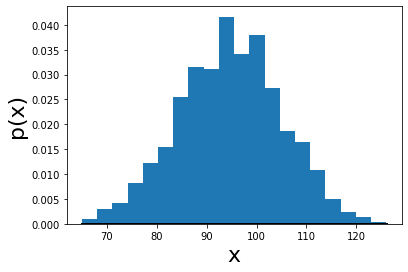

In [2]:
# plot the histogram, i.e., measured distribution of final positions 
#   after n steps of random walking 
n, bins, patches = plt.hist(xvec,bins=20,density=True)
#
# density = True will make it a normalized probability histogram
#
# this retuns as n the number of values counted, bins is the x values of the bins, 
# patches is for plotting the histogram
#
# bins will be the most important thing here - we will use that below
#
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!

# a gaussian probability density distribution, this is a function!
mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
y = mygaus.pdf(bins)  # evaluate the function at the bin locations
plt.plot(bins,y,"k", lw=3 )  #plot the expected density distribution as a black line

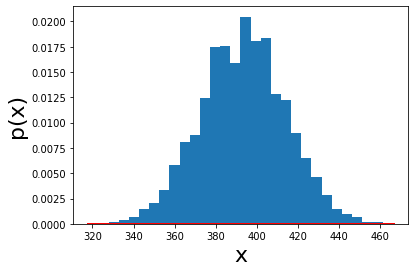

In [3]:
# check that if we increase the number of particles we get the same answer
nsteps = 400 # number of steps
npart = 4000   # number of particles to let walk around
xvec = npart_walkn(npart,nsteps)

# plot the histogram, i.e., measured distribution of final positions after n steps of random walking around
n, bins, patches =plt.hist(xvec,bins=30,density=True)
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)

# a gaussian probability density distribution - is a function!
mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
y = mygaus.pdf(bins) # evaluate the probability distribution at the bin values
plt.plot(bins,y,"r", lw=3 )  #plot the expected density distribution as a red line

In [4]:
# notes on the stats package
n=0
stats.norm.rvs(size=n)  # returns a vector n long that has random values from a normal distribution
stats.norm.rvs()  # returns a single random number (generated from a normal distribution)
func = stats.norm.pdf  # a probability density function that is normal!
# you can call this with func(x)
mean=0; std=1
stats.norm(mean, std).rvs()  # uses a normal distribution with mean and standard deviation

2.465327508064692

In [5]:
func = stats.norm.pdf

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 40.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.]),
 array([-0.5  , -0.475, -0.45 , -0.425, -0.4  , -0.375, -0.35 , -0.325,
        -0.3  , -0.275, -0.25 , -0.225, -0.2  , -0.175, -0.15 , -0.125,
        -0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.075,
         0.1  ,  0.125,  0.15 ,  0.175,  0.2  ,  0.225,  0.25 ,  0.275,
         0.3  ,  0.325,  0.35 ,  0.375,  0.4  ,  0.425,  0.45 ,  0.475,
         0.5  ]),
 <BarContainer object of 40 artists>)

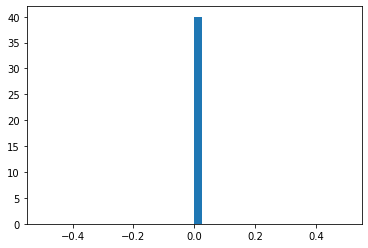

In [6]:
def walk_ditch(xditch,nsteps,sigma):  # random walk using a normal distribution for step sizes
    r = stats.poisson.rvs(size=nsteps,mu=1)  # normal distribution mean=0 variance=sigma^2
    # r is a vector values randomly generated with a normal distribution
        
    for num in r:
        if(random.random() < 0.5):
            temp = r[num-1]
            neg_val = -temp
            r[num-1] = neg_val
            
    xpos = 0.0
    for i in range(nsteps):
        xpos += r[i]
        if xpos>xditch:
            return False
    return True
    
def npart_walk_ditch(npart,xditch,nsteps,sigma):
    
    survive_sum = 0.0
    xvec = np.zeros(0)
    for i in range(npart):
        survive = walk_ditch(xditch,nsteps,sigma)  # a single random walk result
        if survive:
            survive_sum += 1

    survive_prob = survive_sum/npart
    return survive_prob

nsteps = 100 # number of steps
npart = 1000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps

sigma = 1.0
xditch = 1.0*np.sqrt(nsteps)*sigma

N_trials = 1000

sprobdist = []

for i in range(N_trials):
    prob = npart_walk_ditch(npart,xditch,nsteps,sigma)
    sprobdist.append(prob)

plt.hist(sprobdist,bins=40,density=True)

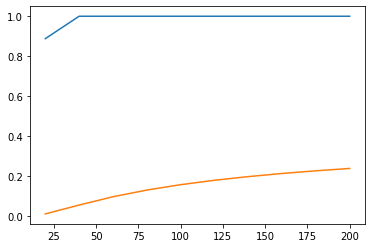

In [7]:
nstepsarray = np.array([20,40,60,80,100,120,140,160,180,200]) # number of steps
npart = 1000 # number of particles (sailors) to let walk around

from math import erfc

# fill a vector with npart walkers each walking nsteps

sigma = 1.0
xditch = 10

sprobdist = []
sprobtheory = []

for nsteps in nstepsarray:
    prob = npart_walk_ditch(npart,xditch,nsteps,sigma)
    sprobdist.append(1-prob)
    
    sigma_N = np.sqrt(nsteps)*sigma
    sprobtheory.append(0.5*erfc(xditch/(np.sqrt(2)*sigma_N)))

plt.plot(nstepsarray,sprobdist)
plt.plot(nstepsarray,sprobtheory)